#### Computation Describtion:
In this dataset, you are provided with 7398 movies and a variety of metadata obtained from The Movie Database (TMDB). Movies are labeled with id. Data points include cast, crew, plot keywords, budget, posters, release dates, languages, production companies, and countries.

You are predicting the worldwide revenue for 4398 movies in the test file.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')

In [3]:
test = pd.read_csv('test.csv')

## EDA
### Data exploration
Examining the dataset to understand its structure, size, and the types of variables it contains.

In [4]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [5]:
test.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


In [6]:
train.shape, test.shape

((3000, 23), (4398, 22))

In [7]:
train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

In [8]:
df = train.append(test)

In [9]:
df.shape

(7398, 23)

In [10]:
df.isnull().sum()

id                          0
belongs_to_collection    5917
budget                      0
genres                     23
homepage                 5032
imdb_id                     0
original_language           0
original_title              0
overview                   22
popularity                  0
poster_path                 2
production_companies      414
production_countries      157
release_date                1
runtime                     6
spoken_languages           62
status                      2
tagline                  1460
title                       3
Keywords                  669
cast                       26
crew                       38
revenue                  4398
dtype: int64

In [11]:
df.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7398 entries, 0 to 4397
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     7398 non-null   int64  
 1   belongs_to_collection  1481 non-null   object 
 2   budget                 7398 non-null   int64  
 3   genres                 7375 non-null   object 
 4   homepage               2366 non-null   object 
 5   imdb_id                7398 non-null   object 
 6   original_language      7398 non-null   object 
 7   original_title         7398 non-null   object 
 8   overview               7376 non-null   object 
 9   popularity             7398 non-null   float64
 10  poster_path            7396 non-null   object 
 11  production_companies   6984 non-null   object 
 12  production_countries   7241 non-null   object 
 13  release_date           7397 non-null   object 
 14  runtime                7392 non-null   float64
 15  spok

In [13]:
# Addin the release date 05/01/2020, which I found through a quick online search
df.loc[test['release_date'].isnull()==True, 'release_date']= '5/1/00'
df[test["release_date"]== '5/1/00']

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
1731,1732,NaN,3900000,"[{'id': 18, 'name': 'Drama'}, {'id': 10769, 'n...",NaN,tt0222012,ta,Hey Ram,Saketh Ram's wife is raped and killed during d...,0.562097,...,2/18/00,199.0,"[{'iso_639_1': 'hi', 'name': 'हिन्दी'}, {'iso_...",Released,An Experiment With Truth.,Hey Ram,"[{'id': 441, 'name': 'assassination'}, {'id': ...","[{'cast_id': 1, 'character': 'Saket Ram', 'cre...","[{'credit_id': '52fe462cc3a368484e082aaf', 'de...",4900000.0
1731,4732,NaN,103000000,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,tt0172495,en,Gladiator,"In the year 180, the death of emperor Marcus A...",23.186667,...,5/1/00,155.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Hero Will Rise.,Gladiator,"[{'id': 588, 'name': 'rome'}, {'id': 1394, 'na...","[{'cast_id': 8, 'character': 'Maximus', 'credi...","[{'credit_id': '52fe4217c3a36847f800340d', 'de...",NaN


In [14]:
# For nominal data, replacing the missing values with "none"
df[['genres',
       'original_language', 
       'spoken_languages', 
       'status', 
       'production_countries', 
       'production_companies', 
       'cast',
       'crew']] = df[['genres',
         'original_language', 
         'spoken_languages',
         'status', 
         'production_countries',
         'production_companies', 
         'cast',
         'crew']].fillna("none")

In [15]:
# For numerical data, replacing the missing values with the mean
df['runtime'] = df['runtime'].fillna(df['runtime'].mean())

### 2. Formatting the dates

In [16]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [17]:
df['day'] = df['release_date'].dt.dayofweek
df['month'] =  df['release_date'].dt.month
df['year']  = df['release_date'].dt.year

In [18]:
df['year'].max()

2072

### Data Visualization
Creating visual representations of the data to help identify patterns, trends, and outliers.

<AxesSubplot:>

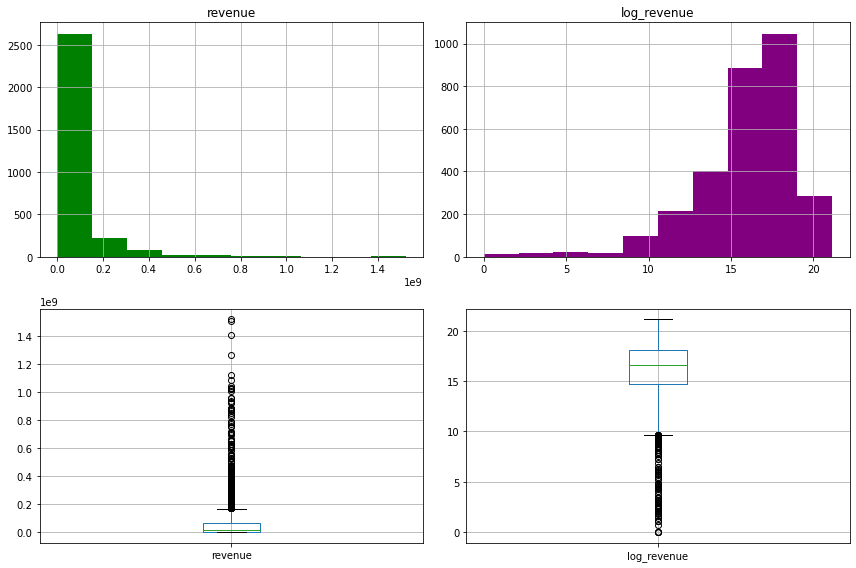

In [19]:
df['log_revenue'] = np.log(df['revenue'])

fig, ax = plt.subplots(2, 2, figsize = (12, 8), tight_layout=True)
df.hist(column= ["revenue"], ax=ax[0][0], color='green')
df.hist(column= ['log_revenue'], ax=ax[0][1], color='purple')
df.boxplot(column= ["revenue"], ax=ax[1][0])
df.boxplot(column= ['log_revenue'], ax=ax[1][1])

array([<AxesSubplot:title={'center':'popularity'}>], dtype=object)

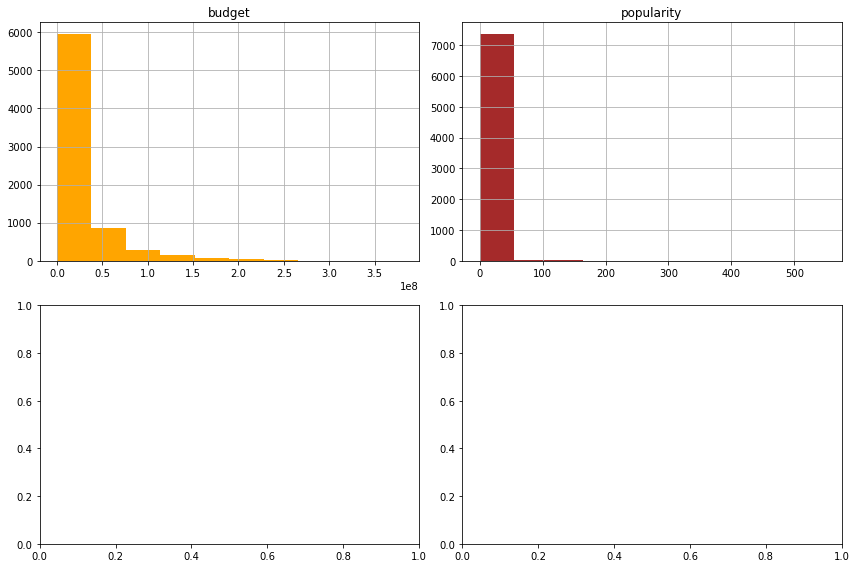

In [20]:
# Univariate Analysis: Budget & Popularity

fig, ax = plt.subplots(2,2, figsize = (12, 8), tight_layout=True)
df.hist(column= ["budget"], ax=ax[0][0], color='orange')
df.hist(column= ['popularity'], ax=ax[0][1], color='brown')

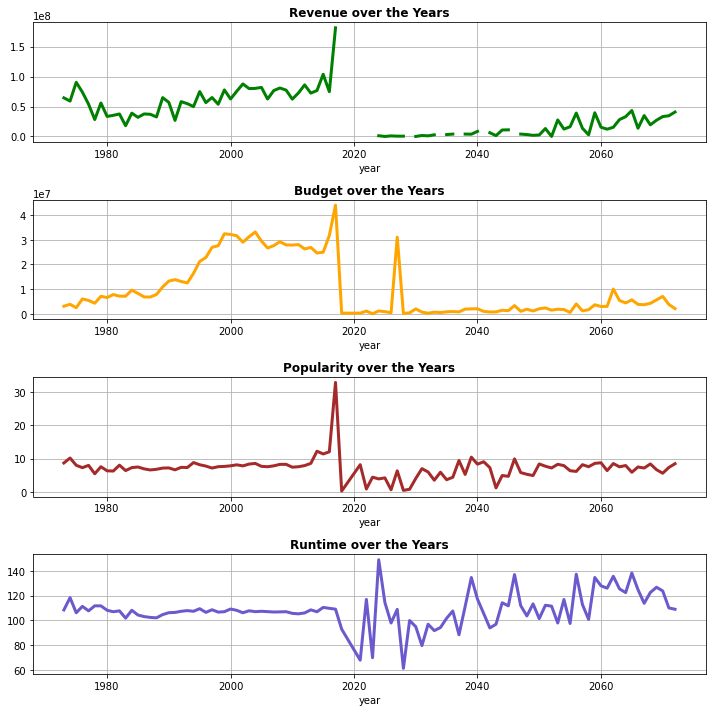

In [21]:
fig, ax = plt.subplots(4, 1, tight_layout=True)
plt.grid()

df.groupby('year')['revenue'].mean().plot(ax=ax[0], figsize=(10, 10), linewidth=3, color='green').set_title('Revenue over the Years', fontweight="bold")
ax[0].grid()

df.groupby('year')['budget'].mean().plot(ax=ax[1], figsize=(10, 10), linewidth=3, color='orange').set_title('Budget over the Years', fontweight="bold")
ax[1].grid()

df.groupby('year')['popularity'].mean().plot(ax=ax[2], figsize=(10, 10), linewidth=3, color='brown').set_title('Popularity over the Years', fontweight="bold")
ax[2].grid()

df.groupby('year')['runtime'].mean().plot(ax=ax[3], figsize=(10, 10), linewidth=3, color='slateblue').set_title('Runtime over the Years', fontweight="bold")
ax[3].grid()

fig.tight_layout(pad=2.0)
plt.show()

### Data Preprocessing
###### Transforming the data to make it suitable for modeling. This can include normalizing, scaling, or encoding categorical variables.

In [22]:
# Many features are in json format.  
for e in enumerate(df['genres'][:10]):
    print(e)

(0, "[{'id': 35, 'name': 'Comedy'}]")
(1, "[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'id': 10749, 'name': 'Romance'}]")
(2, "[{'id': 18, 'name': 'Drama'}]")
(3, "[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'name': 'Drama'}]")
(4, "[{'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}]")
(5, "[{'id': 16, 'name': 'Animation'}, {'id': 12, 'name': 'Adventure'}, {'id': 10751, 'name': 'Family'}]")
(6, "[{'id': 27, 'name': 'Horror'}, {'id': 53, 'name': 'Thriller'}]")
(7, "[{'id': 99, 'name': 'Documentary'}]")
(8, "[{'id': 28, 'name': 'Action'}, {'id': 35, 'name': 'Comedy'}, {'id': 10402, 'name': 'Music'}, {'id': 10751, 'name': 'Family'}, {'id': 12, 'name': 'Adventure'}]")
(9, "[{'id': 35, 'name': 'Comedy'}, {'id': 10402, 'name': 'Music'}]")


In [23]:
# First, I am converting the features in Json format to nominal format
def get_dictionary(s):
    try:
        d = eval(s)
    except:
        d = {}
    return d

In [24]:
df.genres = df.genres.map(lambda x: sorted([d['name'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))
df.spoken_languages = df.spoken_languages.map(lambda x: sorted([d['name'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))
df.cast = df.cast.map(lambda x: sorted([d['name'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))
df.crew = df.crew.map(lambda x: sorted([d['name'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))

In [25]:
df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,tagline,title,Keywords,cast,crew,revenue,day,month,year,log_revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,Comedy,NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","Adam Herschman,Adam Scott,Bianca Haase,Bruce B...","Adam Blum,Allison Gordin,Andrew Panay,Annabell...",12314651.0,4,2,2015,16.326300
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"Comedy,Drama,Family,Romance",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","Abigail Breslin,Anne Hathaway,Callum Blue,Caro...","Bruce Green,Charles Minsky,Debra Martin Chase,...",95149435.0,4,8,2004,18.370959
2,3,NaN,3300000,Drama,http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","Adrian Burks,Amanda Newman,April Grace,Austin ...","Alicia Hadaway,Andy Ross,Barbara Harris,Ben Wi...",13092000.0,4,10,2014,16.387512
3,4,NaN,1200000,"Drama,Thriller",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","Darshan Jariwala,Indraneil Sengupta,Masood Akh...","Sujoy Ghosh,Sujoy Ghosh,Sujoy Ghosh",16000000.0,4,3,2012,16.588099
4,5,NaN,0,"Action,Thriller",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,NaN,Marine Boy,NaN,"Jo Jae-hyeon,Kim Joon-bae,Kim Kang-woo,Park Si...","Jong-seok Yoon,Jong-seok Yoon",3923970.0,3,2,2009,15.182614


In [26]:
# Then, I am counting the occurances in those features which I plan to use in the model, unless they are not redundant.
# For instance, one might expect higher revenue from a movie if that movie was produced in several spoken languages and/or
# had a more crowded crew. 

df['genres_count'] = df['genres'].str.count(',') + 1
df['spoken_languages_count'] = df['spoken_languages'].str.count(',') + 1
df['cast_count'] = df['cast'].str.count(',') + 1
df['crew_count'] = df['crew'].str.count(',') + 1

In [27]:
df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,crew,revenue,day,month,year,log_revenue,genres_count,spoken_languages_count,cast_count,crew_count
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,Comedy,NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,"Adam Blum,Allison Gordin,Andrew Panay,Annabell...",12314651.0,4,2,2015,16.326300,1,1,24,72
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"Comedy,Drama,Family,Romance",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,"Bruce Green,Charles Minsky,Debra Martin Chase,...",95149435.0,4,8,2004,18.370959,4,1,20,9
2,3,NaN,3300000,Drama,http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,"Alicia Hadaway,Andy Ross,Barbara Harris,Ben Wi...",13092000.0,4,10,2014,16.387512,1,1,51,64
3,4,NaN,1200000,"Drama,Thriller",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,"Sujoy Ghosh,Sujoy Ghosh,Sujoy Ghosh",16000000.0,4,3,2012,16.588099,2,2,7,3
4,5,NaN,0,"Action,Thriller",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,"Jong-seok Yoon,Jong-seok Yoon",3923970.0,3,2,2009,15.182614,2,1,4,2


In [28]:
df.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue',
       'day', 'month', 'year', 'log_revenue', 'genres_count',
       'spoken_languages_count', 'cast_count', 'crew_count'],
      dtype='object')

In [29]:
# Converting nominal data to numberical data 
df[['status', 
      'original_language', 
      'production_companies', 
      'production_countries']] = df[['status', 
               'original_language', 
               'production_companies',
               'production_countries']].astype('category')

df['status'] = df['status'].cat.codes
df['original_language'] = df['original_language'].cat.codes
df['production_companies'] = df['production_companies'].cat.codes
df['production_countries'] = df['production_countries'].cat.codes

In [30]:
# Budget has zero values for many movies including some high budget movies. 
# Additionally, it does not make sense to have movies with 0 runtimes. 
# I am imputing those zero values with mean. 
df['budget'] = df['budget'].replace(0, df['budget'].mean())  
df['runtime'] = df['runtime'].replace(0, df['runtime'].mean())  

In [31]:
df_train = df.iloc[:3000]
df_test = df.iloc[3000:]

In [32]:
x = df_train.drop(['log_revenue', 'revenue'], axis=1)
y = df_train['log_revenue']

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train_full, X_valid_full, y_train, y_valid = train_test_split(x, y, train_size=0.8, test_size=0.2,random_state=0)

In [35]:
# Creating the list of features
feature_names = ['year', 'day', 'month', 'status', 'original_language',
                 'budget', 'popularity', 'genres_count', 'production_companies', 'production_countries',
                'spoken_languages_count', 'cast_count', 'crew_count', 'runtime']

# Assigning the data corresponding to features in feature_names
X_train_full = X_train_full[feature_names]

X_valid_full = X_valid_full[feature_names]

X_train_full.head()

,year,day,month,status,original_language,budget,popularity,genres_count,production_companies,production_countries,spoken_languages_count,cast_count,crew_count,runtime
2370,2012,1,3,1,10,150000000.0,7.739904,1,2313,262,1,18,31,99.0
1774,2001,4,10,1,10,35000000.0,7.790140,3,4665,167,3,26,65,122.0
731,2067,6,12,1,10,4000000.0,5.032469,3,4014,647,1,18,25,108.0
271,2006,4,8,1,10,72500000.0,6.936688,1,841,647,1,24,14,116.0
1077,1980,4,8,1,10,20000000.0,3.782547,3,5068,647,1,19,15,96.0


In [36]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

#Veriyi ayırmak için kullanıyoruz

from sklearn.model_selection import train_test_split


#plt.style.use('')

### Data Modeling 
Creating models to make predictions or classify the data.

In [37]:
# Defining the Random Forest Model 
rf_model = RandomForestRegressor(random_state=1)

# Fitting the model 
rf_model.fit(X_train_full, y_train)

RandomForestRegressor(random_state=1)

In [38]:
# Prediction
y_pred_rf = rf_model.predict(X_valid_full)

In [39]:
# Calculate MAE 
mae_rf = mean_absolute_error(y_pred_rf, y_valid)

In [40]:
X = df_train[feature_names]
X_test = df_test[feature_names]

In [41]:
final_model = RandomForestRegressor(random_state=1)

# Fitting the model 
final_model.fit(X, y)

RandomForestRegressor(random_state=1)

In [42]:
submission = pd.read_csv('sample_submission.csv')

In [43]:
y_pred_final = final_model.predict(X_test)
pred = pd.DataFrame(y_pred_final)

In [44]:
datasets = pd.concat([submission['id'], pred], axis=1)
datasets.columns =['id', 'revenue']
datasets.to_csv('submission.csv', index=False)